In [1]:
import pandas as pd
import numpy as np
from dwca.read import DwCAReader
import missingno as msno

In [2]:
%matplotlib inline

In [3]:
dwca_path = '../data/dwca-inboveg-niche-vlaanderen-events-v0.7.zip'

In [4]:
with DwCAReader(dwca_path) as dwca:
    events = pd.read_csv(
        dwca.absolute_temporary_path('event.txt'),
        delimiter='\t',
        dtype=object
    )
    occurrences = pd.read_csv(
        dwca.absolute_temporary_path('occurrence.txt'),
        delimiter='\t',
        dtype=object
    )
    releve = pd.read_csv(
        dwca.absolute_temporary_path('releve.txt'),
        delimiter='\t',
        dtype=object
    )
    measurements = pd.read_csv(
        dwca.absolute_temporary_path('measurementorfact.txt'),
        delimiter='\t',
        dtype=object
    )

In [5]:
def print_unique_values(df):
    for column in df.columns:
        unique_values = df[column].astype(str).unique().tolist()
        if len(unique_values) <= 20:
            unique_values_for_print = ', '.join(unique_values)
        else:
            unique_values_for_print = 'more than 20 values, check seperately'
        print(column + ':\n' + unique_values_for_print +'\n')

## Events

In [6]:
# Number of records
len(events)

569

In [7]:
# Columns
print('\n'.join(events.columns))

id
type
language
license
rightsHolder
accessRights
datasetID
datasetName
ownerInstitutionCode
eventID
samplingProtocol
sampleSizeValue
sampleSizeUnit
eventDate
verbatimEventDate
locationID
continent
countryCode
stateProvince
county
municipality
verbatimLocality
locationAccordingTo
verbatimLatitude
verbatimLongitude
verbatimCoordinateSystem
verbatimSRS
decimalLatitude
decimalLongitude
geodeticDatum
coordinateUncertaintyInMeters


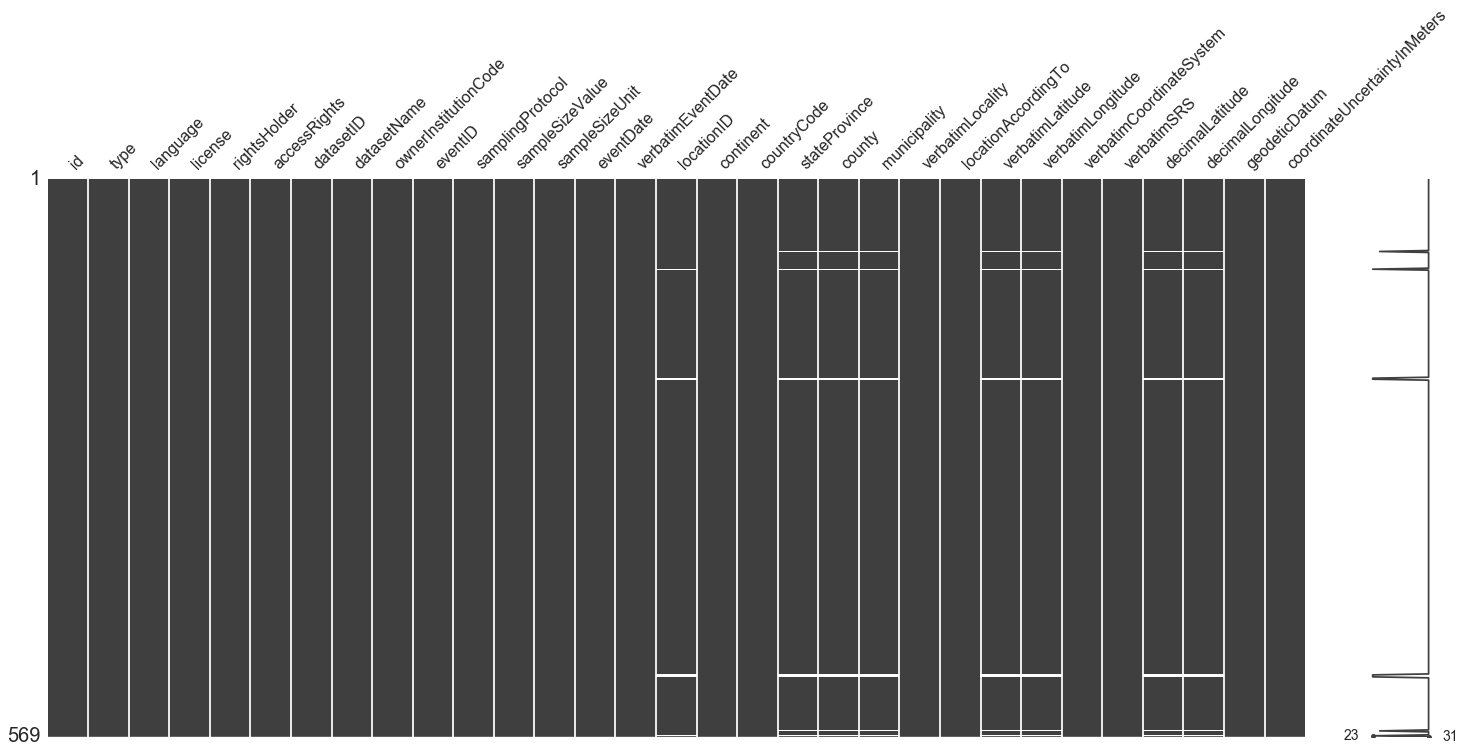

In [8]:
msno.matrix(events)

In [9]:
# Unique values per column
print_unique_values(events)

id:
more than 20 values, check seperately

type:
event

language:
en

license:
http://creativecommons.org/publicdomain/zero/1.0/

rightsHolder:
INBO

accessRights:
http://www.inbo.be/en/norms-for-data-use

datasetID:
http://dataset.inbo.be/Niche-Vlaanderen

datasetName:
InboVeg-niche-Vlaanderen

ownerInstitutionCode:
INBO

eventID:
more than 20 values, check seperately

samplingProtocol:
vegetationPlot- LONDO

sampleSizeValue:
9, 100, 4, 25

sampleSizeUnit:
m²

eventDate:
more than 20 values, check seperately

verbatimEventDate:
more than 20 values, check seperately

locationID:
more than 20 values, check seperately

continent:
Europe

countryCode:
BE

stateProvince:
Vlaams Gewest, nan, XY Onbekend

county:
Antwerpen, West-Vlaanderen, Limburg, Vlaams-Brabant, Oost-Vlaanderen, nan, XY Onbekend

municipality:
more than 20 values, check seperately

verbatimLocality:
more than 20 values, check seperately

locationAccordingTo:
MILKLIM-Gebieden

verbatimLatitude:
more than 20 values, check s

## Occurrences

In [10]:
len(occurrences)

8798

In [11]:
print('\n'.join(occurrences.columns))

id
basisOfRecord
occurrenceID
recordedBy
organismQuantity
organismQuantityType
occurrenceStatus
eventID
identifiedBy
taxonID
scientificName
kingdom
taxonRank
verbatimTaxonRank
scientificNameAuthorship


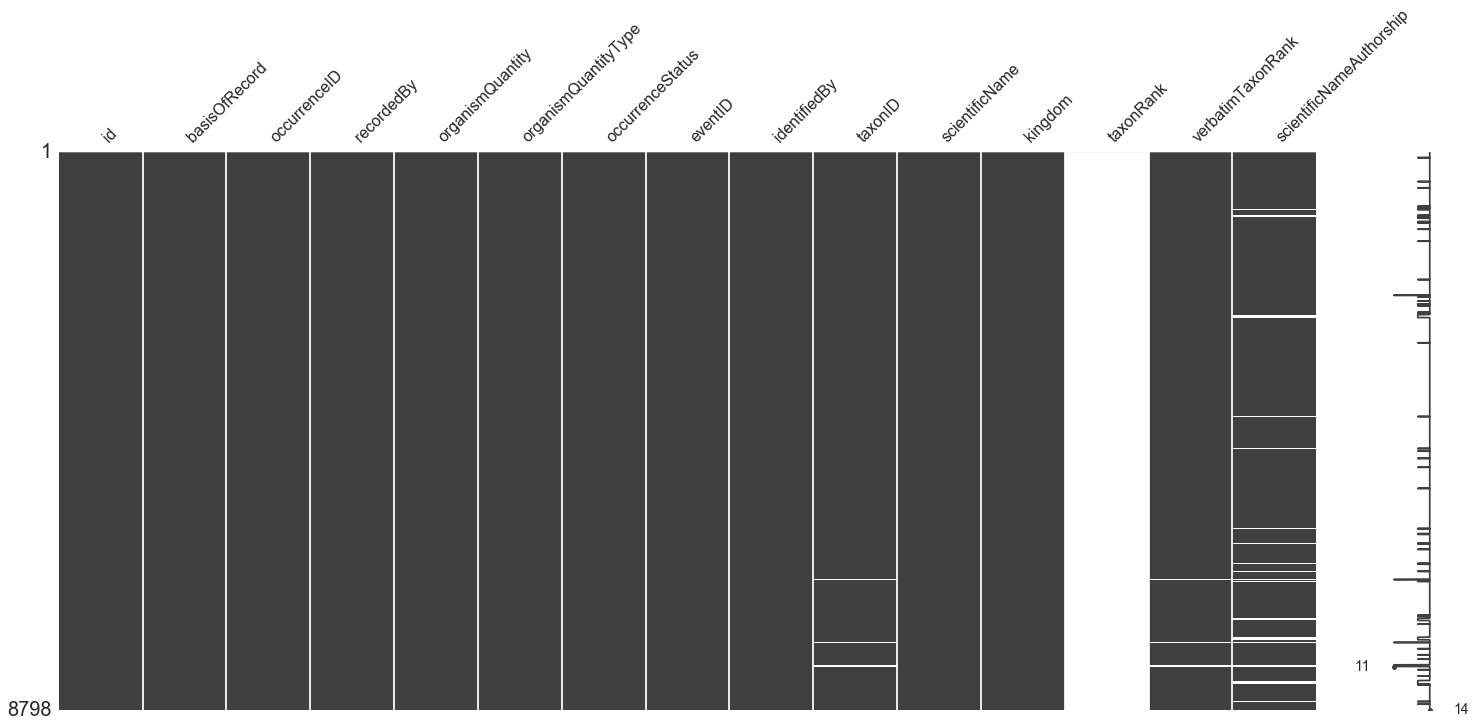

In [12]:
msno.matrix(occurrences)

In [13]:
print_unique_values(occurrences)

id:
more than 20 values, check seperately

basisOfRecord:
HumanObservation

occurrenceID:
more than 20 values, check seperately

recordedBy:
Els De Bie, Jan Wouters, Kris Rombouts, Bart Vandevoorde, Wim Mertens

organismQuantity:
more than 20 values, check seperately

organismQuantityType:
londoScale

occurrenceStatus:
present

eventID:
more than 20 values, check seperately

identifiedBy:
Els De Bie, Jan Wouters, Kris Rombouts, Bart Vandevoorde, Wim Mertens

taxonID:
more than 20 values, check seperately

scientificName:
more than 20 values, check seperately

kingdom:
Plantae

taxonRank:
nan

verbatimTaxonRank:
Spp, Gen, SppGrp, Var, SubSpp, nan, SppHyb

scientificNameAuthorship:
more than 20 values, check seperately



## Relevé

Using http://rs.gbif.org/sandbox/extension/releve_2016-05-10.xml

In [14]:
len(releve)

569

In [15]:
print('\n'.join(releve.columns))

id
coverScale
project
coverTotalInPercentage
coverTreesInPercentage
coverShrubsInPercentage
coverHerbsInPercentage
coverMossesInPercentage
treeLayerHeightInMeters
shrubLayerHeightInMeters
herbLayerHeightInCentimeters
mossesIdentified


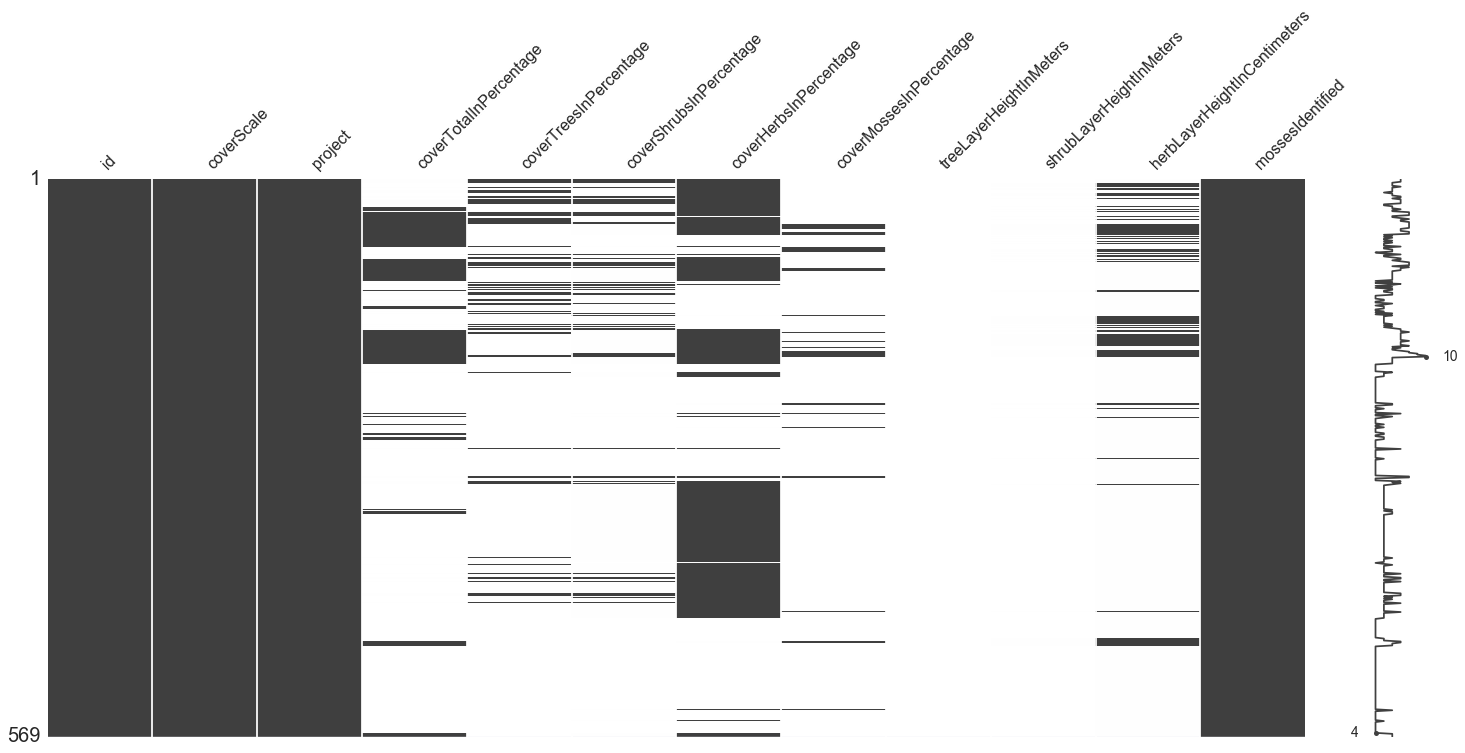

In [16]:
msno.matrix(releve)

In [17]:
print_unique_values(releve)

id:
more than 20 values, check seperately

coverScale:
percentage Pct-1-100

project:
NICHE Vlaanderen

coverTotalInPercentage:
nan, 100, 55, 80, 70, 90, 60, 40, 50

coverTreesInPercentage:
85, 40, 80, 90, nan, 30, 50, 60, 70, 65, 10, 4, 20, 75, 35

coverShrubsInPercentage:
30, 60, 10, 15, nan, 50, 20, 25, 5, 1, 80, 2, 40, 85, 70, 3, 90

coverHerbsInPercentage:
100, 90, 80, 70, nan, 95, 40, 55, 3, 10, 60, 75, 27, 20

coverMossesInPercentage:
nan, 90, 40, 20, 70, 80, 100, 1, 60, 5, 50, 30, 10, 15

treeLayerHeightInMeters:
nan

shrubLayerHeightInMeters:
nan

herbLayerHeightInCentimeters:
more than 20 values, check seperately

mossesIdentified:
yes



In [18]:
max(releve[releve['herbLayerHeightInCentimeters'].notnull()]['herbLayerHeightInCentimeters'].astype(int).unique())

170

## Measurements or facts (as an alternative for relevé)

In [19]:
print_unique_values(measurements)

id:
more than 20 values, check seperately

measurementID:
more than 20 values, check seperately

measurementType:
HerbLayerHeightInCentimeters, coverShrubsInPercentage, coverTreesInPercentage, coverHerbsInPercentage, totalCoverageInPercentage, coverMossesInPercentage

measurementValue:
more than 20 values, check seperately

measurementUnit:
cm, %

measurementMethod:
estimate, Percentage Pct-1-100

measurementRemarks:
mossesIdentified:yes



In [20]:
len(measurements)

664

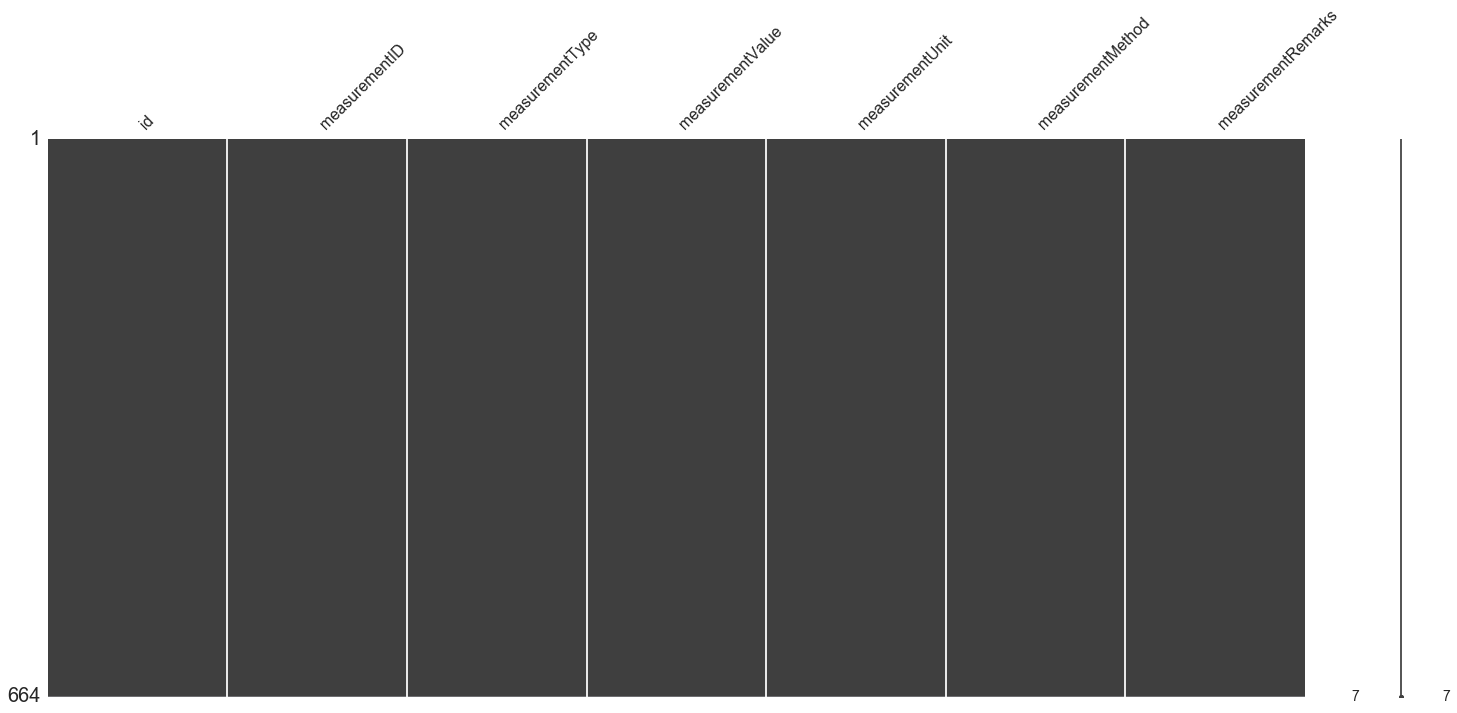

In [21]:
msno.matrix(measurements)

In [22]:
# number of unique events
len(measurements['id'].unique())

352

## Experimenting

In [23]:
events['decimalLongitude'].astype(float).min()

2.8536800000000002